In [1]:
import networkx as nx 
import pandas as pd 
from matplotlib import pyplot as plt 

from jaal import Jaal 
from jaal.datasets import load_got

import numpy as np 
from networkx.algorithms import community

import pandas as pd
from cdlib import algorithms, viz
import igraph as ig

/home/teddy/miniconda3/envs/nx_env/lib/python3.9/site-packages/dash_bootstrap_components/_table.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


# BMI 567/667 Networkx Tutorial 
--- 

Written by Nate Evans (evansna@ohsu.edu)

--- 

[Networkx](https://networkx.org/documentation/stable/) is a python package developed for working with graph data. This class does not require students to use networkx or python for their projects; however, python and networkx are very powerful and extensible tools.  

The official `Networkx documentation` has a nice [tutorial](https://networkx.org/documentation/stable/tutorial.html), which covers much of the same material you'll see in this document. The purpose of *this* tutorial is to provide you the pythonic tools to handle BMI 567/667, and to be a "Movie Trailer" for the course - e.g., to show off some of the exciting applications of network science.

Be sure to check back in on [these](https://networkx.org/documentation/stable/auto_examples/index.html) networkx examples later on. 

[Ted Laderas](https://laderast.github.io/), one of DMICE's previous professors, put together a tutorial using `igraph` in R - for those who'd rather use R for their network analysis, this may be a useful resource. See his tutorial [here](https://github.com/laderast/igraphTutorial). 

# To start, let's make a graph 

---
---

In `networkx` graph Objects are created by calling `nx.Graph()`, which will initialize and empty graph - you will need to add all the desired edges, nodes and attributes. That said, there are a number of ways to create graphs from `csv` edge lists, adjacency matrices or load common graphs into local memory.  

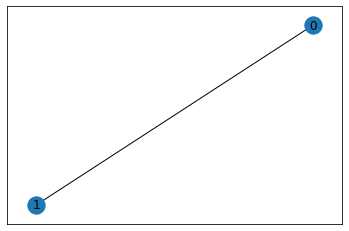

In [2]:
G = nx.Graph()          # initializes an empty undirected graph object (for directed graphs, use `nx.DiGraph`) 
G.add_edge(0, 1)        # add an edge from node 0 to node 1

nx.draw_networkx(G)     # plot the graph (this uses a force directed layout, we'll talk about this below)

Note that previously to `G.add_edge` there were no nodes and after this there were 2. The `add_edge` function will create new nodes if they don't already exist, but will use the current node if it's already in the graph. 

# Nodes do not have to be integers - can be strings! 

Although, note that some applications of graphs require integer identifiers for each node - but we can always assign an integer mapping later. 

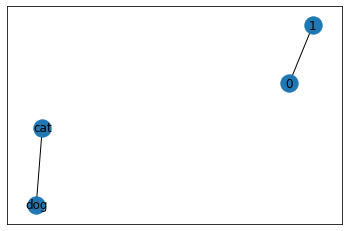

In [3]:
G.add_edge('dog', 'cat')
nx.draw_networkx(G)

# What if I have a whole bunch of edges? Do I have to wrap this in a loop?

Ick, no. 

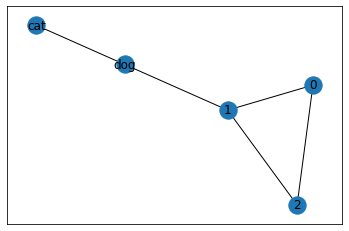

In [4]:
lots_of_edges = [(0, 2), (2,1), (1,'dog')]  # list of tuples containing edges connecting nodes u to v: [(u1,v1), (u2,v2),...]

G.add_edges_from(lots_of_edges)

nx.draw_networkx(G)

# We can add `attributes` to both **edges** and **nodes**.  

We can add attributes to nodes either during node creation or after the fact by accessing the node attributes directly. 

attribute dictionary: {'tree': False}


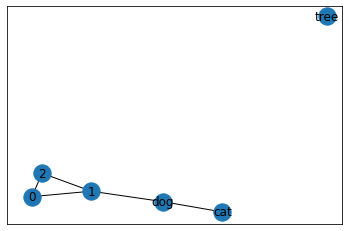

In [5]:
# first lets create a new node with an attribute
G.add_nodes_from([
    ('tree', {"is_animal": False}),
])

# note our `tree` node doesn't have any edges yet. 
nx.draw_networkx(G)

# but we can access the node attributes by 
print('attribute dictionary:', nx.get_node_attributes(G, name='is_animal'))

In [6]:
# we can also modify attributes after node creation by directly accessing the attribute dictionary
G.nodes['cat']['is_animal'] = True
G.nodes['dog']['is_animal'] = True

for i in range(3): 
    G.nodes[i]['is_animal'] = False

nx.get_node_attributes(G, name='is_animal')

{0: False, 1: False, 'dog': True, 'cat': True, 2: False, 'tree': False}

# Let's visualize the attributes! 

Can't stress how valuable graph visualizations are - both to understand your data and to debug issues. 

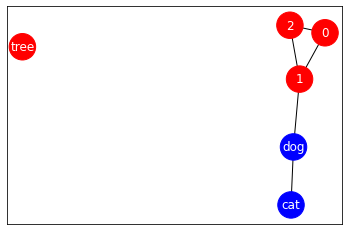

In [7]:
# we can also use the attributes for visualization 
attr_dict = nx.get_node_attributes(G, name='is_animal') 

nodelist = list(attr_dict.keys())
colors = [['r', 'b'][int(attr)] for attr in attr_dict.values()]

nx.draw_networkx(G, nodelist=nodelist, node_color=colors, font_color='w', node_size=700)

# How to add edge attributes 

Edges can hold attributes as well, and a common form is `edge weights` (e.g., a numerical value assigned to each edge which could represent strength, flow, or something else). 

In [8]:
attributes = {(0, 1): {"attr1": 20, "attr2": "nothing"}, (1, 2): {"attr2": 3}}

nx.set_edge_attributes(G, attributes)

In [9]:
# how edge attributes can be accessed 
nx.edges(G)[(0,1)]

{'attr1': 20, 'attr2': 'nothing'}

In [10]:
# another way edge attributes can be accessed 
nx.get_edge_attributes(G, 'attr2')

{(0, 1): 'nothing', (1, 2): 3}

<hr style="border:20px"> </hr>


# Excercise 1. 

<hr style="border:5px black"> </hr>


Try making a new graph by hand, include 

a) at least 5 nodes  
b) at least 1 edge attribute   
c) at least 1 node attribute   

Then plot your graph. 

Useful functions: 

> [nx.Graph()](https://networkx.org/documentation/stable/reference/classes/graph.html?highlight=graph#networkx.Graph)  
> [G.add_node()](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_node.html?highlight=add_node#networkx.Graph.add_node)    
> [nx.add_edges_from()](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_edges_from.html)   
> [nx.set_node_attributes()](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html)   
> [nx.set_edge_attributes()](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_edge_attributes.html?highlight=set_edge_attributes#networkx.classes.function.set_edge_attributes)    
> [nx.draw_networkx()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)   


--- 
--- 

# (end) Excercise 1. 

---
---

# General Graph Formats 


Graphs can come in many formats, each with advantages and disadvantages. For now, let's cover the basics of the more common forms. 


## 1. Edge lists 

Edge lists are super common and very convenient as they're human readable and quite intepretable. These can be read directly into memory using the networkx functions: 

[nx.from_pandas_edgelist()](https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html?highlight=from_pandas_edgelist#networkx.convert_matrix.from_pandas_edgelist)  
[nx.read_edgelist()](https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html#networkx.readwrite.edgelist.read_edgelist)  
[nx.read_weighted_edgelsit](https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_weighted_edgelist.html#networkx.readwrite.edgelist.read_weighted_edgelist)   


![image](http://www.lucadavidian.com/wp-content/uploads/2020/08/edge-list___-1024x486.jpg) 

[image source](http://www.lucadavidian.com/2020/08/18/graphs/) 

## 2. Adjacency Matrices 

These are square matrices (unless you're working with bipartite graphs - can imagine why?) where the row index indicates the node `from` and the column index indicates the node `to`. The matrix value indicate whether an edge exists and can be binary or continuous (weighted edges). More info: [[Barbasi]](http://networksciencebook.com/chapter/2#matrix), [[Wiki]](https://en.wikipedia.org/wiki/Adjacency_matrix#:~:text=In%20graph%20theory%20and%20computer,or%20not%20in%20the%20graph.&text=If%20the%20graph%20is%20undirected,the%20adjacency%20matrix%20is%20symmetric.) 

![](https://mathworld.wolfram.com/images/eps-gif/AdjacencyMatrix_1002.gif) 

[image source](https://mathworld.wolfram.com/AdjacencyMatrix.html) 

## 3. Sparse Matrices 

Sparse matrices are memory efficient and suitable for many algorithms - for instance, many graph machine learning methods rely on sparse matrices. 

`The general idea: Store only non-zero entries of the adjacency matrix.` 

![image](https://matteding.github.io/images/coo.gif)

[image source](https://matteding.github.io/2019/04/25/sparse-matrices/) 


In [11]:
# We can write out graph to an edge list with networkx 
list(nx.generate_edgelist(G))

["0 1 {'attr1': 20, 'attr2': 'nothing'}",
 '0 2 {}',
 "1 2 {'attr2': 3}",
 '1 dog {}',
 'dog cat {}']

In [12]:
# or write it to disk 
nx.write_edgelist(G, path='./my_graph_edgelist.txt')
# note: nx.read_edgelist() also exists 

In [13]:
A_sparse = nx.adjacency_matrix(G)
A_sparse

<6x6 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [14]:
A = A_sparse.todense()
A

matrix([[0, 1, 0, 0, 1, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]])

In [15]:
# graphs can be read into memory via adjacency matrices using:
# nx.from_pandas_adjacency() 
# and 
# nx.from_numpy_matrix()

# Let's learn to navigate the graph

---
---

**General Python Tip**: If you are every curious about the python datatype you can use the function `type()` - or if you want to know what methods are attributed to an object, use `dir()` 


`G.nodes()` returns a **nodeview** objects, which is an interable. 

Additionally, we can access node attributes using either the graph `G` or the `nodeview`. 

In [16]:
for node in G.nodes(): 
    print(node)

0
1
dog
cat
2
tree


In [17]:
nodeview = G.nodes()
for node in G.nodes(): 
    print('node:', node)
    print('nodeview access:', nodeview[node])
    print('graph access:', G[node])
    print()

node: 0
nodeview access: {'is_animal': False}
graph access: {1: {'attr1': 20, 'attr2': 'nothing'}, 2: {}}

node: 1
nodeview access: {'is_animal': False}
graph access: {0: {'attr1': 20, 'attr2': 'nothing'}, 2: {'attr2': 3}, 'dog': {}}

node: dog
nodeview access: {'is_animal': True}
graph access: {'cat': {}, 1: {}}

node: cat
nodeview access: {'is_animal': True}
graph access: {'dog': {}}

node: 2
nodeview access: {'is_animal': False}
graph access: {0: {}, 1: {'attr2': 3}}

node: tree
nodeview access: {'is_animal': False}
graph access: {}



In [18]:
G.edges()

EdgeView([(0, 1), (0, 2), (1, 2), (1, 'dog'), ('dog', 'cat')])

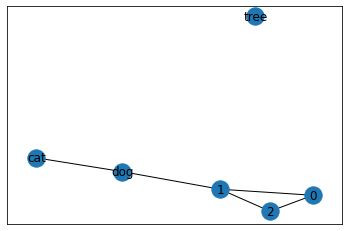

In [19]:
nx.draw_networkx(G)

--- 
---
# Exercise 2 
--- 
---

Ponder these questions: 
- What does nodeview access give you? What does Graph node access return to you? 
- How can you navigate the graph from a given node? e.g., traverse along edges from node to node 

a) Try to get all the neighbors of `node 33` in the [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). 

Check that you got the right neighbors by comparing to the graph plot below. 

b) See if you can traverse from `node 16` to `node 26` using only [G.neighbors(node)](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html). 

- Was this the shortest path? 
- Were there other equally short paths? 
- What was the longest path? 


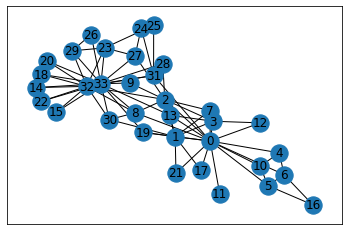

In [20]:
KCG = nx.karate_club_graph() # This is one of the datasets that networkx has stored
                             # more datasets can be found here: 

nx.draw_networkx(KCG)

---
---
# (end) Excercise 2
---
---

Altherative ways to access neighbors include `nx.neighbors(graph, node)` ... this will return a iterator of the neighbors - just like iterating through a graph node view - see the nx master plan yet? 

Also, I know we haven't talked about it yet, but we can also create `Directed Graphs` (*nx.DiGraph()*). For these graph types, you may want to know the  `children/successors` or `parents/predecessors` for this you can use the methods: `nx.successors(graph, node)` or `nx.predecessors`. 

# Network Visualization
--- 

`networkx`'s graph visualization is built on top of the `matplotlib` package. For everyone familiar with this plotting package, networkx syntax is similar. For those not familiar, some of the following resources may be useful: 

- [Matplotlib documentation & tutorials](https://matplotlib.org/stable/tutorials/index) - *pure gold* 
- [Towards Datascience tutorial](https://towardsdatascience.com/matplotlib-tutorial-learn-basics-of-pythons-powerful-plotting-library-b5d1b8f67596) - *quick basics* 
- [Datacamp](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python) - *requires account* 
- [Stackexchange](https://stackexchange.com/) - *My go-to for all tricky coding questions*

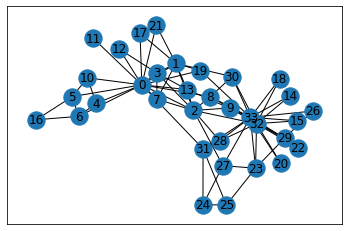

In [21]:
plt.figure()              # creates a figure on which we will be plotting - all current matplotlib operations will be automatically done to this figure
nx.draw_networkx(KCG)     # function modifying our figure and creating the visualziation - this is most basic plotting function 
plt.show()                # display and clear the figure

### Graph Layouts and positioning 

There are many different graph layouts, which dictates where each node is plotted. This is essentially a dimensionality reduction step from high-dimension down to 2D. As you can imagine, this becomes a very challenging step as the graphs become larger and larger (e.g., higher dimensionality). 

Note: `networkx` is not designed to be a visualization software - so recognize there are going to be limitations. 

Some common graph layouts include: 
- [nx.spring_layout()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) 
- [nx.shell_layout()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.shell_layout.html) 
- [nx.random_layout()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.rescale_layout.html)
- [nx.planar_layout()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.planar_layout.html)  - *only applies to planar graphs* 
- [nx.kamada_kawai_layout()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.kamada_kawai_layout.html) 
- [nx.circular_layout()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.circular_layout.html) 

This can be useful to "zoom in" or "zoom out": [nx.rescale_layout()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.rescale_layout.html)


Networkx offers access to some of the `Graphviz` functionality through:

- [nx.graphviz_layout()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pydot.graphviz_layout.html#networkx-drawing-nx-pydot-graphviz-layout) with `prog` options of: 
    - 'neato'
    - 'dot' 
    - 'twopi'
    - 'fdp' 
    - 'sfdp' 
    - 'circo'

All of these methods will return a `dict` that provides node positions. e.g., 

```
pos = {node_name : (x_pos, y_pos)} 
```

As such, you can always manually create node positions; however, your position dictionary **must** contain the position for every node in your graph, otherwise an exception will get raised. 

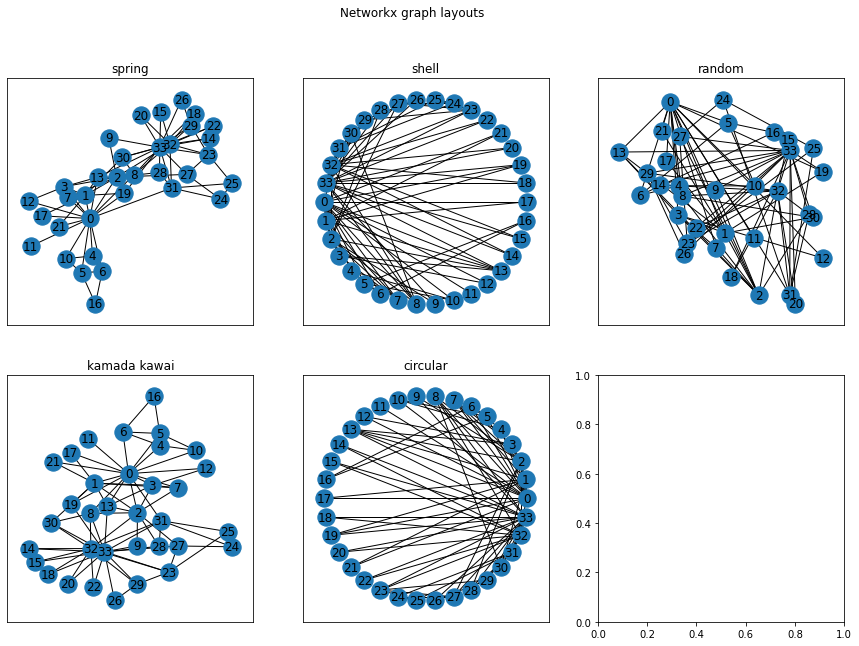

In [22]:
f, axes = plt.subplots(2,3, figsize=(15,10))

opts = {'spring':nx.spring_layout(KCG), 'shell':nx.shell_layout(KCG), 'random':nx.random_layout(KCG), 'kamada kawai':nx.kamada_kawai_layout(KCG), 'circular':nx.circular_layout(KCG)}

for ax,(name,pos) in zip(axes.flat, opts.items()):
    nx.draw_networkx(KCG, pos=pos, ax=ax)
    ax.set_title(name)
    
plt.suptitle('Networkx graph layouts')
plt.show()

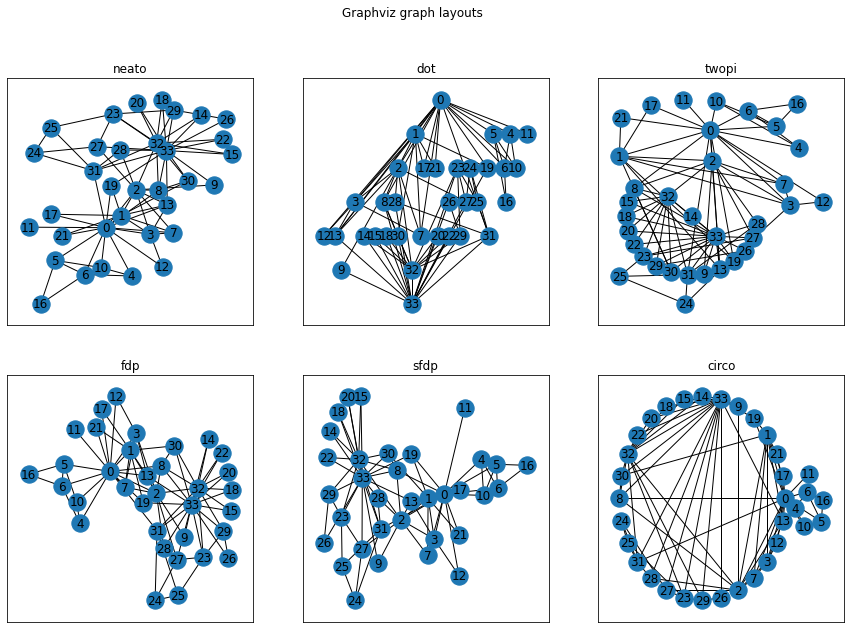

In [23]:
f, axes = plt.subplots(2,3, figsize=(15,10))

opts = {prog:nx.drawing.nx_pydot.graphviz_layout(G=KCG, prog=prog) for prog in ['neato','dot','twopi','fdp','sfdp','circo']}

for ax,(name,pos) in zip(axes.flat, opts.items()):
    nx.draw_networkx(KCG, pos=pos, ax=ax)
    ax.set_title(name)
    
plt.suptitle('Graphviz graph layouts')
plt.show()

## Want more detail and control? 

Then use: 

- [nx.draw_networkx_nodes()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html)
- [nx.draw_networkx_edges()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html)
- [nx.draw_networkx_labels()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_labels.html)

This allows for a ton of control, including `shape`, `color`, and `style`. 

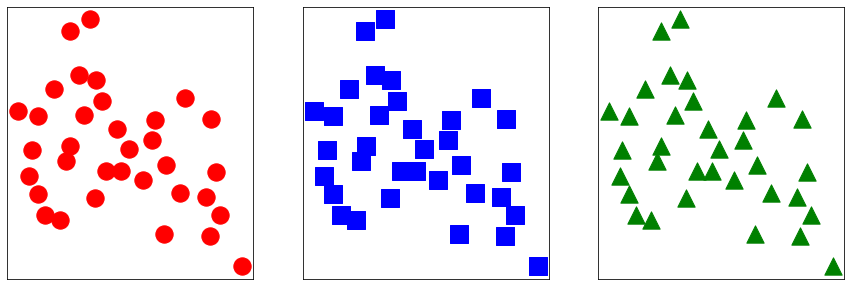

In [28]:
pos = nx.spring_layout(KCG)

# node shape options: ‘so^>v<dph8’

f, axes = plt.subplots(1,3, figsize=(15,5))
nx.draw_networkx_nodes(KCG, pos=pos, node_color='r', node_shape='o', ax=axes[0])
nx.draw_networkx_nodes(KCG, pos=pos, node_color='b', node_shape='s', ax=axes[1])
nx.draw_networkx_nodes(KCG, pos=pos, node_color='g', node_shape='^', ax=axes[2])
plt.show()

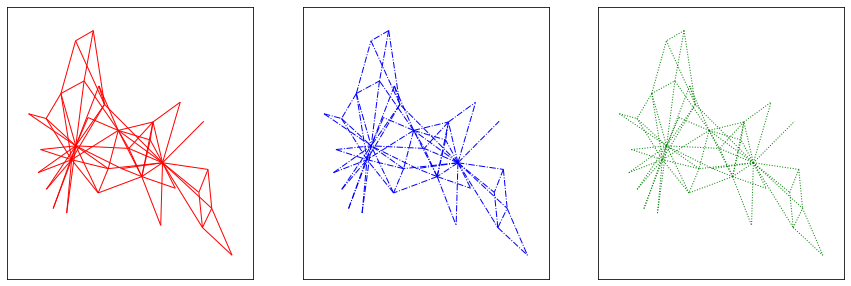

In [29]:
# edge styles: ‘-‘, ‘–’, ‘-.’, ‘:’ or words like ‘solid’ or ‘dashed’

f, axes = plt.subplots(1,3, figsize=(15,5))
nx.draw_networkx_edges(KCG, pos=pos, edge_color='r', style='-', ax=axes[0])
nx.draw_networkx_edges(KCG, pos=pos, edge_color='b', style='-.', ax=axes[1])
nx.draw_networkx_edges(KCG, pos=pos, edge_color='g', style=':', ax=axes[2])
plt.show()

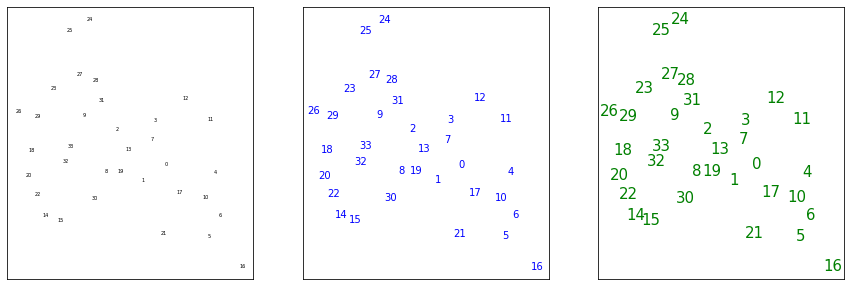

In [59]:
f, axes = plt.subplots(1,3, figsize=(15,5))

nx.draw_networkx_nodes(KCG, pos=pos, node_color='w', ax=axes[0])   # Found a bug networkx - relative position is shifted if this isn't called 
nx.draw_networkx_nodes(KCG, pos=pos, node_color='w', ax=axes[1])   # feel free to try it yourself - comment these three lines out
nx.draw_networkx_nodes(KCG, pos=pos, node_color='w', ax=axes[2])   # if it's reproduced on everyones computer we can file a bug for it

nx.draw_networkx_labels(KCG, pos=pos, font_color='k', font_size=5, ax=axes[0])
nx.draw_networkx_labels(KCG, pos=pos, font_color='b', font_size=10, ax=axes[1])
nx.draw_networkx_labels(KCG, pos=pos, font_color='g', font_size=15, ax=axes[2])
plt.show()

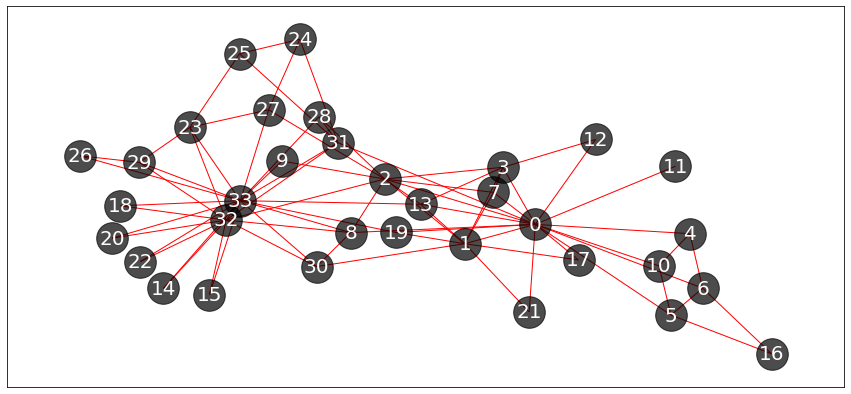

In [42]:
plt.figure(figsize=(15,7))

nx.draw_networkx_nodes(KCG, pos=pos, node_color='k', node_size=1000, node_shape='o', alpha=0.7)
nx.draw_networkx_edges(KCG, pos=pos, edge_color='r', style='-')
nx.draw_networkx_labels(KCG, pos=pos, font_color='w', font_size=20)

plt.show()

## Visualizing node specific or attributes 

For instance, let's say we want to color all the neighbors of `node 33` differently than non-neighbors. 

We can do this using the `node_color` argument of `nx.draw_networkx_nodes()`. By passing an list of colors, we can specify individual node colors. The order should match `G.nodes()` **OR** a custom node order can be specified using the `nodelist` argument. See the [docs](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html) for more info.

This can also be done for `labels` or `edges` in similar fashion. 

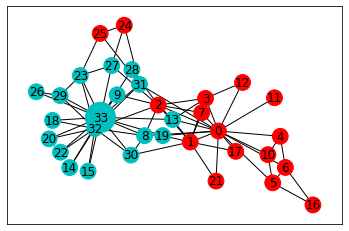

In [79]:
neighbors33 = [x for x in KCG.neighbors(33)] + [33]

nx.draw_networkx(KCG, 
                 pos=pos, 
                 node_color=[['r', 'c'][x in neighbors33] for x in KCG.nodes()], 
                 node_size=[[250, 900][x == 33] for x in KCG.nodes()])

---
---


# Excercise 3

---
---

Plot the KCG graph, but: 

- change the color of nodes 1,10,12 and 26.
- make node 12 really big 
- make the edge from node 33 to node 13 really big and color it red 

--- 
---

# (end) Excercise 3 
---
---


# Alternative Graph Visualization Tools

Other tools, like [cytoscape](https://cytoscape.org/), [igraph](https://igraph.org/), [graphviz](https://graphviz.org/) or [graphia](https://graphia.app/) may be better suited for large graph visualization. 

Python's `matplotlib` and `netowrkx` has a lot of convenience and extensibility for plotting; however, it is not interactive and I've never been completely content with the plotting layouts (like force-directed/spring or circular), especially for large graphs. 

To improve on this, there are some other tools that have been developed for interactive graph visualization. Dr. Wu will introduce you to cytoscape. One pythonic approach that I like is the [Jaal](https://github.com/imohitmayank/jaal) package, which is built on [Dash](https://dash.plotly.com/) and [visdcc](https://github.com/jimmybow/visdcc). 

## Let's try out Jaal... 

In [122]:
edge_df, node_df = load_got() 

edge_df.head()

,from,to,weight,strength
0,Aemon-Targaryen-(Maester-Aemon),Jeor-Mormont,13,medium
1,Aemon-Targaryen-(Maester-Aemon),Jon-Snow,34,medium
2,Aerys-II-Targaryen,Robert-Baratheon,12,medium
3,Aggo,Daenerys-Targaryen,11,medium
4,Alliser-Thorne,Jon-Snow,32,medium


In [123]:
node_df.head()

,id,gender,screentime
0,Illyrio-Mopatis,male,3.30
1,Jory-Cassel,male,6.15
2,Viserys-Targaryen,male,20.30
3,Mirri-Maz-Duur,female,7.30
4,Jhogo,male,1.00


In [125]:
Jaal(edge_df, node_df).plot()  # NOTE: This won't work if you're working from `mybinder` 

Parsing the data...Done
Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [03/Jan/2022 20:19:26] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Jan/2022 20:19:26] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [03/Jan/2022 20:19:26] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [03/Jan/2022 20:19:26] "GET /_favicon.ico?v=2.0.0 HTTP/1.1" 200 -
127.0.0.1 - - [03/Jan/2022 20:19:26] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jan/2022 20:19:26] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jan/2022 20:19:26] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jan/2022 20:19:26] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jan/2022 20:19:26] "POST /_dash-update-component HTTP/1.1" 200 -


No trigger


# Community Detection

---
---

Within a graph, we often want to know if there are subsets of nodes that are more strongly connected - we call such subsets a `community` and many algorithms have been developed to detect these communities. 

We will explore communnity detection in depth later in this course but for now, accept that one method of community detection is based on maximizing the [modularity](https://en.wikipedia.org/wiki/Modularity_(networks)) of node subsets. 

> `Modularity`: Modularity is the fraction of the edges that fall within the given groups minus the expected fraction if edges were distributed at random. 

![image](https://dist.neo4j.com/wp-content/uploads/20190315074210/modularity-graph-database-1.png)


## Our own quick example


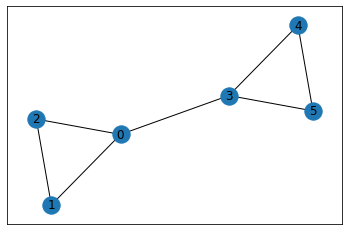

In [81]:
G = nx.Graph()
G.add_edges_from([(0,1), (1,2), (2,0), (3,0), (3,4), (3,5), (4,5)])
nx.draw_networkx(G)

## If we had to partition this graph into two communities, what would give the highest modularity? 

In [82]:
nx.algorithms.community.quality.modularity(G, communities=[{0,1,2},{3,4,5}])

0.35714285714285715

In [83]:
nx.algorithms.community.quality.modularity(G, communities=[{2,3,4},{5,0,1}])

-0.21428571428571425

# Community Clustering with the `louvain` algorithm 

---
---

This method is well suited to large graphs and performs well in practice - It attempts to maximize the modularity of the partitions. 

For more information, see [wikipedia](https://en.wikipedia.org/wiki/Louvain_method) or [chapter 9](http://networksciencebook.com/chapter/9#modularity) of the Barbasi textbook. 

Note, we are using the `cdlib` package for these community detection methods - not networkx.
More info [here](https://cdlib.readthedocs.io/en/latest/).

In [227]:
coms = algorithms.louvain(KCG) 

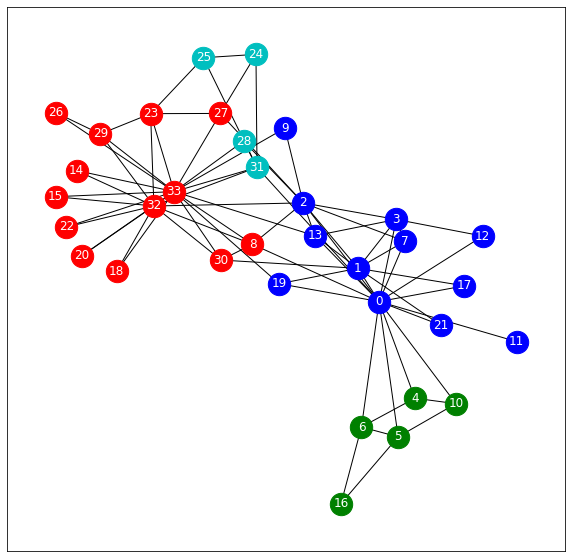

In [228]:
pos = nx.spring_layout(KCG) 

plt.figure(figsize=(10,10))

for com,color in zip(coms.communities, ['r','b','g','c']): 
    nx.draw_networkx_nodes(KCG.subgraph(com), pos=pos, node_color=color, node_size=500)

nx.draw_networkx_labels(KCG, pos=pos, font_color='w')
nx.draw_networkx_edges(KCG, pos=pos)
plt.show()

<Figure size 432x288 with 0 Axes>

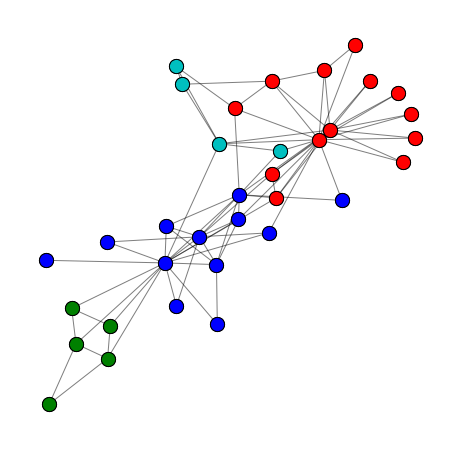

In [231]:
# `cdlib` also has this useful function

plt.figure()
viz.plot_network_clusters(KCG, coms)
plt.show()

# Graph metrics! 

We haven't covered this yet, but many metrics can be calculated for nodes, edges and whole-graphs. These metrics can be used to understand node or edge importance, graph connectness and density, and much more! 

To begin, let's introduce `node degree`: The degree of a node is the number of incoming or outgoing edges and can be further divided into `in-degree` and `out-degree` if our network is directed. 

The distribution of a graphs node-degrees is important in several ways - and this will be discussed later in the course. For now, let's explore how to get the degree of a node and graph.


## A few common graph metrics

![image](https://www.frontiersin.org/files/Articles/439505/fnins-13-00585-HTML-r1/image_m/fnins-13-00585-g005.jpg) 

Image citation: 

1. Farahani FV, Karwowski W, Lighthall NR. Application of Graph Theory for Identifying Connectivity Patterns in Human Brain Networks: A Systematic Review. Front Neurosci. 2019 Jun 6;13:585. doi: 10.3389/fnins.2019.00585. PMID: 31249501; PMCID: PMC6582769.

In [36]:
# to get node degree: 
G.degree()

DegreeView({0: 3, 1: 2, 2: 2, 3: 3, 4: 2, 5: 2})

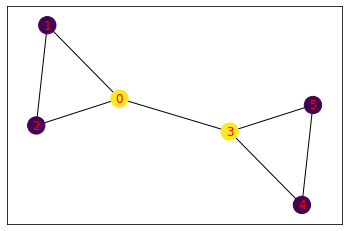

In [112]:
# whats this look like?
nx.draw_networkx(G, node_color=list(dict(G.degree()).values()), font_color='r')

In [92]:
nx.degree_centrality(G)

{0: 0.6000000000000001, 1: 0.4, 2: 0.4, 3: 0.6000000000000001, 4: 0.4, 5: 0.4}

In [93]:
nx.betweenness_centrality(G)

{0: 0.6000000000000001, 1: 0.0, 2: 0.0, 3: 0.6000000000000001, 4: 0.0, 5: 0.0}

In [94]:
# the original google algorithm
nx.pagerank(G)

{0: 0.20802924444783152,
 1: 0.1459853777760842,
 2: 0.1459853777760842,
 3: 0.20802924444783152,
 4: 0.1459853777760842,
 5: 0.1459853777760842}

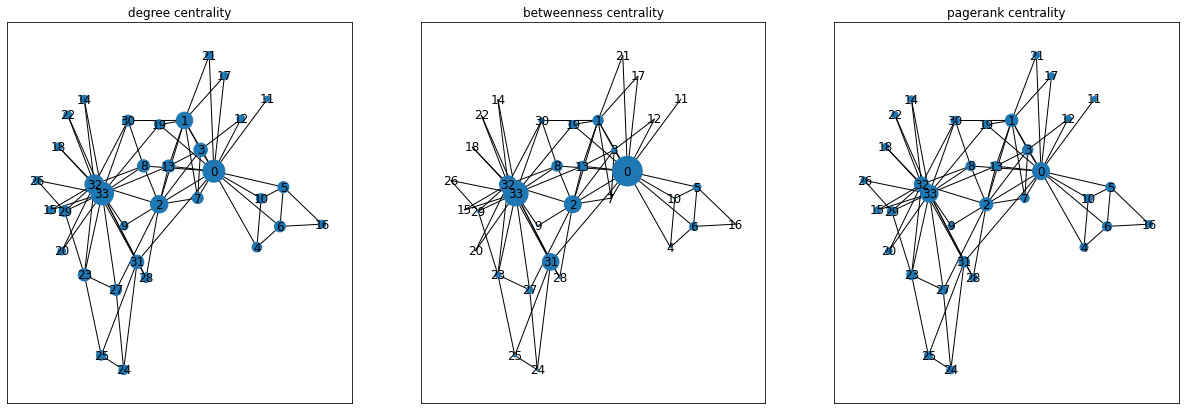

In [111]:
f, axes = plt.subplots(1,3, figsize=(21,7))

pos = nx.spring_layout(KCG)

nx.draw_networkx_edges(KCG, pos=pos, ax=axes[0])
nx.draw_networkx_edges(KCG, pos=pos, ax=axes[1])
nx.draw_networkx_edges(KCG, pos=pos, ax=axes[2])

nx.draw_networkx_nodes(KCG, pos=pos, node_size=1000*np.array(list(nx.degree_centrality(KCG).values())), ax=axes[0])  
nx.draw_networkx_nodes(KCG, pos=pos, node_size=2000*np.array(list(nx.betweenness_centrality(KCG).values())), ax=axes[1])  
nx.draw_networkx_nodes(KCG, pos=pos, node_size=3000*np.array(list(nx.pagerank(KCG).values())), ax=axes[2])   

nx.draw_networkx_labels(KCG, pos=pos, ax=axes[0])
nx.draw_networkx_labels(KCG, pos=pos, ax=axes[1])
nx.draw_networkx_labels(KCG, pos=pos, ax=axes[2])

axes[0].set_title('degree centrality')
axes[1].set_title('betweenness centrality')
axes[2].set_title('pagerank centrality')

plt.show()

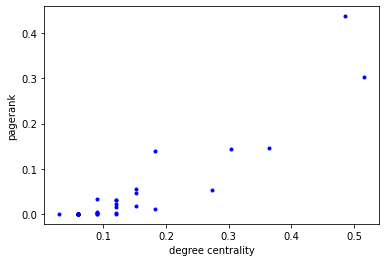

In [115]:
plt.figure()
plt.plot(np.array(list(nx.degree_centrality(KCG).values())), np.array(list(nx.betweenness_centrality(KCG).values())), 'b.')
plt.xlabel('degree centrality')
plt.ylabel('pagerank')
plt.show()

## Let's use a bigger graph 

We'll generate a random graph using [nx.dual_barabasi_albert_graph](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html).

You can adjust the number of nodes using the `n` parameter. What do you notice about the plotting as `n` gets large? 

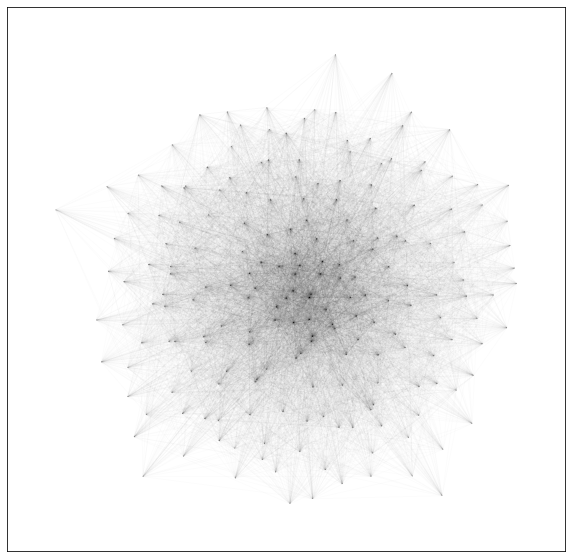

In [117]:
# plot the degree distribution for 

big_G = nx.dual_barabasi_albert_graph(n=200, m1=50, m2=50, p=0.05, seed=0)

pos = nx.spring_layout(big_G)

plt.figure(figsize=(10,10))
nx.draw_networkx_edges(big_G, pos=pos, alpha=0.01)
plt.show()

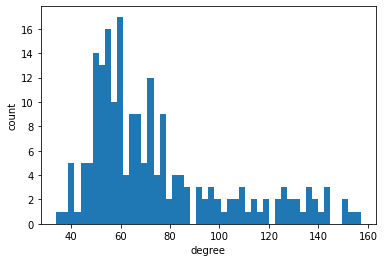

In [118]:
plt.figure()
plt.hist(dict(big_G.degree()).values(), bins=50)
plt.xlabel('degree')
plt.ylabel('count')
plt.show()

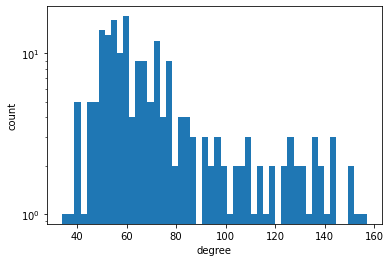

In [119]:
# for degree distributions, we often visualize in log counts. 

plt.figure()
plt.hist(dict(big_G.degree()).values(), bins=50)
plt.xlabel('degree')
plt.ylabel('count')
plt.yscale('log')
plt.show()

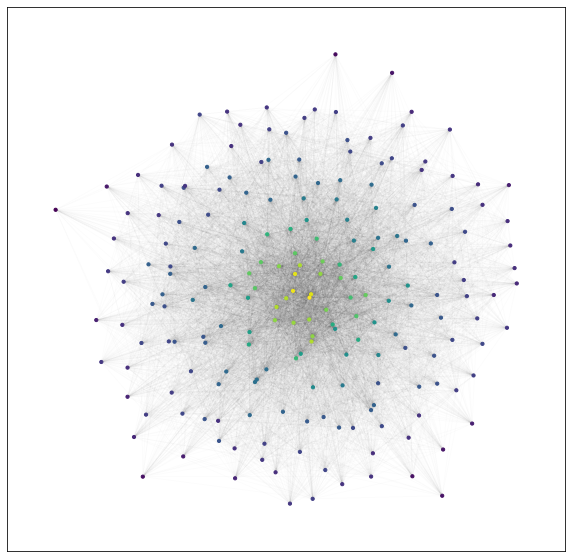

In [120]:
dc = dict(nx.centrality.degree_centrality(big_G))
nodelist = list(dc.keys())
centrality = list(dc.values())

plt.figure(figsize=(10,10))
nx.draw_networkx_edges(big_G, pos=pos, alpha=0.01)
nx.draw_networkx_nodes(big_G, pos=pos, nodelist=nodelist, node_color=centrality, alpha=1, node_size=10)
plt.show()

# Clustering Coeficient 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Clustering_coefficient_example.svg/320px-Clustering_coefficient_example.svg.png" alt="drawing" width="100"/>

> [Wikipedia](https://en.wikipedia.org/wiki/Clustering_coefficient): "Example local clustering coefficient on an undirected graph. The local clustering coefficient of the blue node is computed as the proportion of connections among its neighbours which are actually realised compared with the number of all possible connections. In the figure, the blue node has three neighbours, which can have a maximum of 3 connections among them. In the top part of the figure all three possible connections are realised (thick black segments), giving a local clustering coefficient of 1. In the middle part of the figure only one connection is realised (thick black line) and 2 connections are missing (dotted red lines), giving a local cluster coefficient of 1/3. Finally, none of the possible connections among the neighbours of the blue node are realised, producing a local clustering coefficient value of 0." 

{0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0, 10: 0.6666666666666666, 11: 0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882}


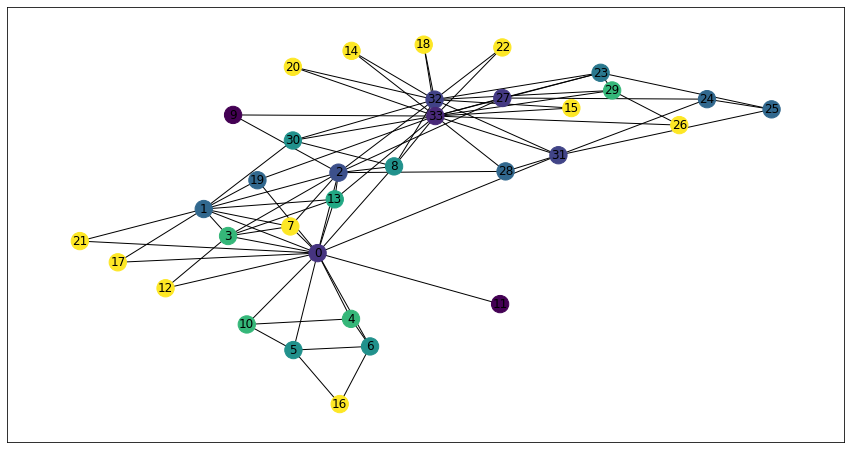

In [121]:
cluster_coef = nx.algorithms.cluster.clustering(KCG)
print(cluster_coef)

plt.figure(figsize=(15,8))
nx.draw_networkx(KCG, node_color=list(dict(cluster_coef).values()))
plt.show()

# Let's do a real analysis! 

We'll use the reactome functional interaction network, which can be downloaded [here](https://reactome.org/download/tools/ReatomeFIs/FIsInGene_122220_with_annotations.txt); For convenience, this is already in the github `data/` folder. 

citation: 

Wu, G., Feng, X. & Stein, L. A human functional protein interaction network and its application to cancer data analysis. Genome Biol 11, R53 (2010). https://doi.org/10.1186/gb-2010-11-5-r53 

In [127]:
fi_data = pd.read_csv('data/FIsInGene_122220_with_annotations.txt', sep='\t')
fi_data.head()

,Gene1,Gene2,Annotation,Direction,Score
0,16-5-5,CDC42,predicted,-,0.98
1,16-5-5,PARD3,predicted,-,1.00
2,16-5-5,PARD3B,predicted,-,1.00
3,A1CF,APOBEC1,catalyzed by; complex; input,<-,1.00
4,A1CF,EP300,expression regulated by,<-,1.00


In [128]:
# what type of edges are there? 
fi_data.groupby('Annotation').count()['Gene1'].sort_values(ascending=False).head(10)

Annotation
complex; input                            64423
predicted                                 41182
complex                                   16502
catalyzed by                              11337
catalyze                                  10691
input                                      8231
catalyze; catalyzed by; complex; input     7698
activated by                               6674
activate                                   5677
catalyze; catalyzed by; input              5501
Name: Gene1, dtype: int64

In [129]:
# what directions types are there? 
fi_data.groupby('Direction').count()['Gene1']

Direction
-      146616
->      41272
-|       4748
<-      43056
<->     15413
<-|      1043
|-       5554
|->      1376
|-|        73
Name: Gene1, dtype: int64

In [130]:
fi_G = nx.from_pandas_edgelist(fi_data, source='Gene1', target='Gene2', edge_attr=['Annotation', 'Direction', 'Score'])

how many nodes/genes are there? 14006
how many edges are there? 259151
how many `predicted` edges are there? 41182
how many true/known edges are there? 217969
percentage of predicted edges: 15.89 %


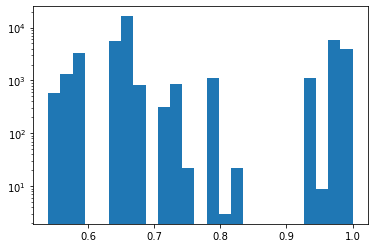

In [131]:
# first, let's get some basic info... (extract this info directly from the graph object, e.g., don't use the dataframe) 

n_nodes = len(fi_G)
print(f'how many nodes/genes are there? {n_nodes}')

n_edges = len(fi_G.edges())
print(f'how many edges are there? {n_edges}')

n_pred_edges = len([x for x in nx.get_edge_attributes(fi_G, 'Annotation').values() if x == 'predicted'])
print(f'how many `predicted` edges are there? {n_pred_edges}')

n_known_edges = len([x for x in nx.get_edge_attributes(fi_G, 'Annotation').values() if x != 'predicted'])
print(f'how many true/known edges are there? {n_known_edges}')

print(f'percentage of predicted edges: {(100*n_pred_edges / (n_known_edges + n_pred_edges)):.2f} %')


## plot the distribution of edge "score" of "predicted" edges. 
#### what y-axis scaling is most useful? 
scores = nx.get_edge_attributes(fi_G, 'Score')
annot = nx.get_edge_attributes(fi_G, 'Annotation')
pred_scores = [scores[edge] for edge in annot if annot[edge] == 'predicted']

plt.figure() 
plt.hist(pred_scores, bins=25)
plt.yscale('log')
plt.show()


# What does the degree distribution look like? 

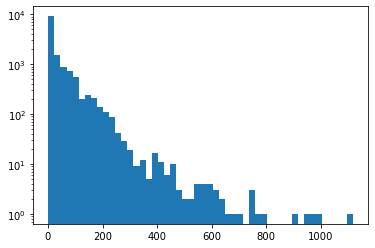

In [132]:
plt.figure()
plt.hist(dict(fi_G.degree()).values(), bins=50)
plt.yscale('log')
plt.show()

# Who are these nodes with really high degree? 

Represent "Hubs" in the protein-protein interaction network - what might this mean? 

In [133]:
{k:v for k,v in dict(fi_G.degree()).items() if v > 750}

{'EP300': 1117,
 'STAT1': 752,
 'RPS27A': 969,
 'UBA52': 942,
 'UBB': 781,
 'UBC': 792,
 'PRKACA': 914,
 'PRKACB': 753,
 'GNB1': 989}

# What is the most common edge `Annotation` of the gene with highest degree? 

In [134]:
fi_data[lambda x: ((x.Gene1 == 'EP300') | (x.Gene2 == 'EP300'))].groupby('Annotation').count()['Gene1'].sort_values(ascending=False).head(10)

Annotation
expression regulates                    376
complex; input                          154
expression regulated by                 152
predicted                               104
GErel: expression                        35
complex; input; reaction                 35
reaction                                 35
activate; inhibited by                   20
GErel: expression by                     17
complex; expression regulates; input     16
Name: Gene1, dtype: int64

# Are there isolates? multiple components? 

![](http://web.math.princeton.edu/math_alive/5/Lab1/Isolated.jpg)

[image source](http://web.math.princeton.edu/math_alive/5/Lab1/Defs.html)

A graph can be in one or many components, additionally - some nodes may not have any edges, and we call these isolates. 

In [135]:
# how many isolates are there? 
len(list(nx.isolates(fi_G)))

0

In [136]:
# how many components are there?
comps = list(nx.connected_components(fi_G))
len(comps)

94

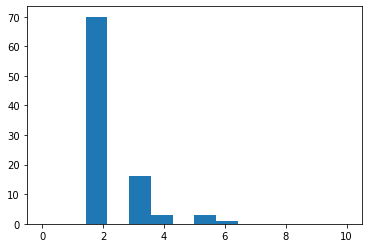

largest components: [13785, 6, 5, 5, 5]


In [137]:
# are there multiple large components? 

plt.figure()
plt.hist([len(x) for x in comps], bins=np.linspace(0,10,15))
plt.show()

print('largest components:', sorted([len(x) for x in comps])[::-1][0:5])

# Let's focus on just the largest component we'll filter the nodes in other components

To do this we will use [nx.subgraph()](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html). 

But what is a subgraph? 

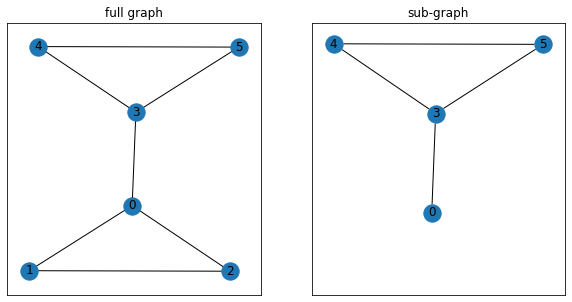

In [155]:
pos = nx.spring_layout(G)

f, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].set_title('full graph')
nx.draw_networkx(G, ax=axes[0], pos=pos)

G2 = nx.subgraph(G, {0,3,4,5}) # create subgraph
nx.draw_networkx_nodes(G, pos, ax=axes[1], node_color='w')
nx.draw_networkx(G2, ax=axes[1], pos=pos)
axes[1].set_title('sub-graph')
plt.show()

In [156]:
fi_G2 = nx.subgraph(fi_G, comps[0])
len(fi_G2) # confirm we used the right component

13785

# Plot the graph 

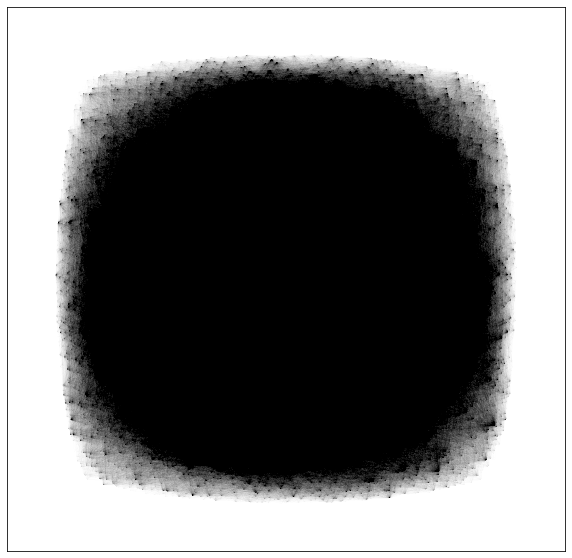

In [157]:
# this can take a while (~1-5 minutes) so make sure to just do it once 
# you can reduce the `iterations` (default 50) to speed the step up. 
# see docs: https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html

pos = nx.spring_layout(fi_G2, iterations=5, k=10, seed=0)
plt.figure(figsize=(10,10))
nx.draw_networkx_edges(fi_G2, pos=pos, alpha=0.002)
plt.show()

# So useful! 

For this tutorial, let's try to focus in on a smaller piece. How do we choose though? 

We'll use community detection to identify sub-graphs. For this we'll use a new community detection algorithm called [infomap](https://www.mapequation.org/infomap/#References). 

In [159]:
coms = algorithms.infomap(fi_G2)

for i,com in enumerate(coms.communities): 
    if len(com) > 50: print(f'community {i}: size: {len(com)} | density: {nx.density(fi_G2.subgraph(com)):.2f} | avg. cluster coef.: {np.array(list(nx.cluster.clustering(fi_G2.subgraph(com)).values())).mean():.3f}')

community 0: 1802 | density: 0.01 | avg. cluster coef.: 0.308
community 1: 874 | density: 0.04 | avg. cluster coef.: 0.488
community 2: 437 | density: 0.21 | avg. cluster coef.: 0.737
community 3: 431 | density: 0.06 | avg. cluster coef.: 0.379
community 4: 340 | density: 0.08 | avg. cluster coef.: 0.560
community 5: 334 | density: 0.14 | avg. cluster coef.: 0.642
community 6: 319 | density: 0.10 | avg. cluster coef.: 0.488
community 7: 294 | density: 0.01 | avg. cluster coef.: 0.869
community 8: 264 | density: 0.05 | avg. cluster coef.: 0.466
community 9: 245 | density: 0.34 | avg. cluster coef.: 0.749
community 10: 239 | density: 0.35 | avg. cluster coef.: 0.729
community 11: 221 | density: 0.23 | avg. cluster coef.: 0.744
community 12: 219 | density: 0.08 | avg. cluster coef.: 0.639
community 13: 209 | density: 0.09 | avg. cluster coef.: 0.255
community 14: 201 | density: 0.08 | avg. cluster coef.: 0.491
community 15: 188 | density: 0.08 | avg. cluster coef.: 0.382
community 16: 184

In [199]:
fiComp = fi_G2.subgraph(coms.communities[1])

In [200]:
pos = nx.spring_layout(fiComp, iterations=50, seed=0)

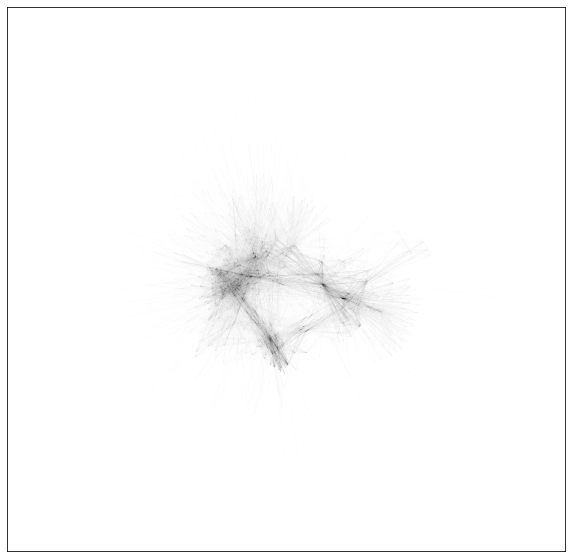

In [201]:
plt.figure(figsize=(10,10))
nx.draw_networkx_edges(fiComp, pos=pos, alpha=0.005)
plt.show()

# Let's think about how to visualize our graph in a new way. 

Instead of plotting all the nodes, let's take a `graph coarsening` approach: Nodes will now represent communities (# members ~ node size) and edges represent the number of member interactions with proteins in other communities.

In [223]:
communities = [x for x in coms.communities if len(x) > 50] # filter our network to only communities with X members

newG = nx.Graph() 
for i,com1 in enumerate(communities): 
    newG.add_node(i, size= len(com1)) 

weights = []

# add edges 
for i,com1 in enumerate(communities): 
    print(f'progress: {i/len(communities)*100:.1f} %', end='\r')
    for j,com2 in enumerate(communities[i:]): 
        shared_edges = list(nx.algorithms.boundary.edge_boundary(fi_G2, com1, com2))
        weight = len(shared_edges) / min([len(nx.subgraph(fi_G2, com1).edges()), len(nx.subgraph(fi_G2, com2).edges())])
        weights.append(weight)
        if weight > 0.1: 
            newG.add_edge(i,j, n_edges=len(shared_edges), weight=weight)
        
newG.remove_edges_from(nx.selfloop_edges(newG))

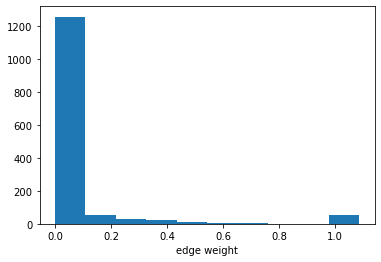

In [224]:
plt.figure()
plt.hist(weights)
plt.xlabel('edge weight')
plt.show()

<Figure size 432x288 with 0 Axes>

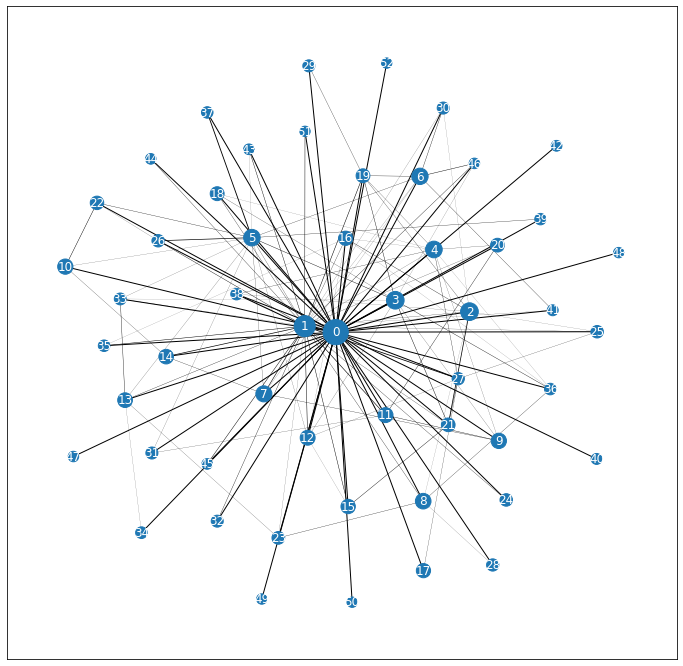

<Figure size 432x288 with 0 Axes>

In [225]:
pos = nx.spring_layout(newG)

plt.figure(figsize=(12,12))
nx.draw_networkx_nodes(newG, pos=pos, nodelist=newG.nodes(), node_size=15*np.array(list(nx.get_node_attributes(newG, 'size').values()))**(0.5))
nx.draw_networkx_labels(newG, pos=pos, font_color='w')
nx.draw_networkx_edges(newG, pos=pos, edgelist=newG.edges(), width=np.array(list(nx.get_edge_attributes(newG, 'weight').values())))
plt.figure()


# Back to clustering coefficients 

In [141]:
clus_coefs = nx.cluster.clustering(fi_G) # could also use: nx.pagerank(fi_G) 

res = pd.DataFrame({k:[v] for k,v in clus_coefs.items()}).T.reset_index().rename({0:'cluster_coef', 'index':'Gene'}, axis=1).sort_values('cluster_coef', ascending=False)
res.head()

,Gene,cluster_coef
11252,NEURL4,1.0
12852,MT1X,1.0
8678,WEE2,1.0
12850,MT1L,1.0
4305,ITM2B,1.0


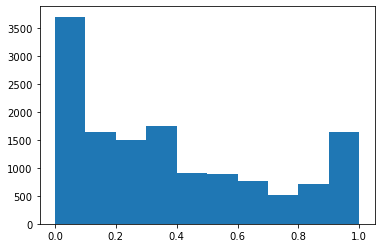

In [142]:
plt.figure()
plt.hist(res.cluster_coef)
plt.show()

In [143]:
res.cluster_coef.mean()

0.37429054765775677

In [210]:
# what gene has the highest centrality? 
cent = nx.degree_centrality(fi_G2)
max_centrality = sorted(cent.values())[-1]

[k for k,v in cent.items() if v == max_centrality]

['EP300']

# Other Resources and personal ramblings

The `Stanford Network Analysis Project` has some excellent resources including a wide range of graph datasets. These may be useful for your term project and I highly recommend exploring their website: 
- [SNAP](http://snap.stanford.edu/index.html) 
- [SNAP bio datasets](http://snap.stanford.edu/biodata/index.html)
- [SNAP for python](http://snap.stanford.edu/snappy/index.html) 

---

[pytorch-geometric](https://pytorch-geometric.readthedocs.io/en/latest/index.html) is a package for writing graph deep learing algorithms and also offers a range of well organized and documented datasets that may be useful. They can be found [here](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html). I've used this package extensively and can vouch for it's value. 

--- 

[DGL](https://lifesci.dgl.ai/index.html) is another package for graph deep learning, which I have not used at all; however, it does offer a range of datasets that may be useful to your term project. They can be found [here](https://lifesci.dgl.ai/api/data.html). Note: these datasets do not have to be used with deep learning - I'm just providing them to show you what is available. 

